In [1]:
%cd /Data/Projects/HaritoProduction
from backend.app.thyroid_cancer_app import ThyroidCancerClassificationModel
import numpy as np
import torch

model = ThyroidCancerClassificationModel()
image_origin_dir = (
    "/Data/Projects/ThyroidCancer_InfoData_Local/dataver1/test/.B2/B2_9.jpg"
)
image_origin_dir = (
    "/Data/Projects/ThyroidCancer/Phase1/Data/origin_data/B256/B6/Image_26389.jpg"
)

# output_model1 = model.get_output_model1(image_origin_dir)

/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Data/Projects/HaritoProduction
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [2]:
predicted, outputs, patch_level_heatmap, image_level_heatmap, yolo_detect_image = model.run_app(image_origin_dir)

Loading /Data/Projects/HaritoProduction/backend/app/models/cell_cluster_detect_300_epoches_best.onnx for ONNX Runtime inference...

image 1/1 /Data/Projects/ThyroidCancer/Phase1/Data/origin_data/B256/B6/Image_26389.jpg: 640x640 10 clusters, 52.4ms
Speed: 2.5ms preprocess, 52.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
/Data/Projects/ThyroidCancer/Phase1/Data/origin_data/B256/B6/Image_26389.jpg have 10 cell importance clusters
<class 'numpy.ndarray'> (18, 224, 224, 3) float64
<class 'torch.Tensor'> torch.Size([18, 1280, 7, 7]) torch.float32
torch.Size([18, 1280, 7, 7]) torch.float32
torch.Size([1280]) torch.float32
torch.Size([18, 49])
torch.Size([18, 1280, 49])
torch.Size([18, 7, 7])
torch.Size([18, 7, 7])
<class 'torch.Tensor'> torch.Size([1, 3]) torch.float32


In [4]:
print(patch_level_heatmap.shape, image_level_heatmap.shape, yolo_detect_image.shape)

(768, 1024) (768, 1024) (960, 1224, 3)


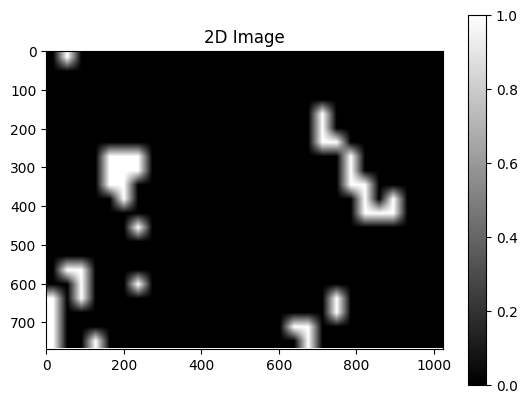

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Vẽ hình ảnh 2D
plt.imshow(patch_level_heatmap, cmap='gray')
plt.colorbar()
plt.title('2D Image')
plt.show()


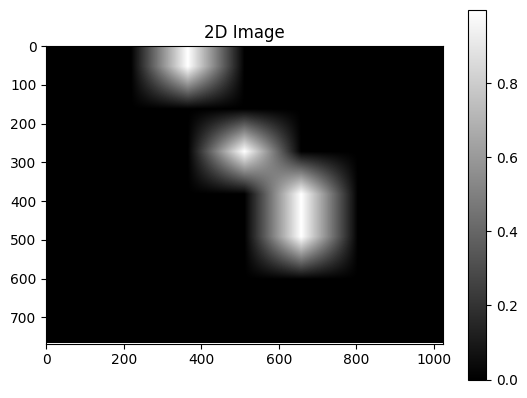

In [6]:
# Vẽ hình ảnh 2D
plt.imshow(image_level_heatmap, cmap='gray')
plt.colorbar()
plt.title('2D Image')
plt.show()

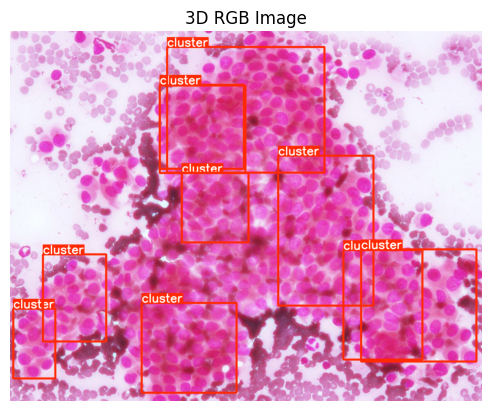

In [13]:
# Vẽ hình ảnh RGB
plt.imshow(yolo_detect_image,)
plt.title('3D RGB Image')
plt.axis('off')  # Ẩn các trục
plt.show()

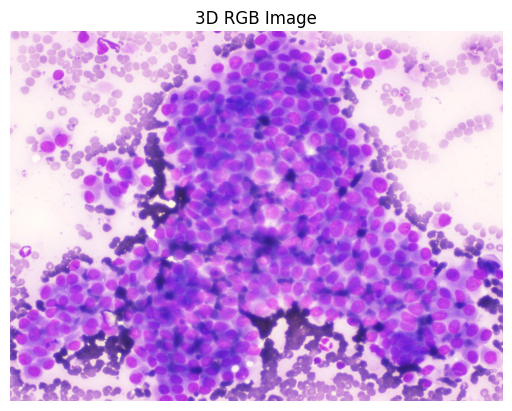

In [15]:
# Vẽ hình ảnh RGB
plt.imshow(model.origin_image)
plt.title('3D RGB Image')
plt.axis('off')  # Ẩn các trục
plt.show()

In [16]:
image_level_heatmap.min(), image_level_heatmap.max()

(0.0, 0.99853516)

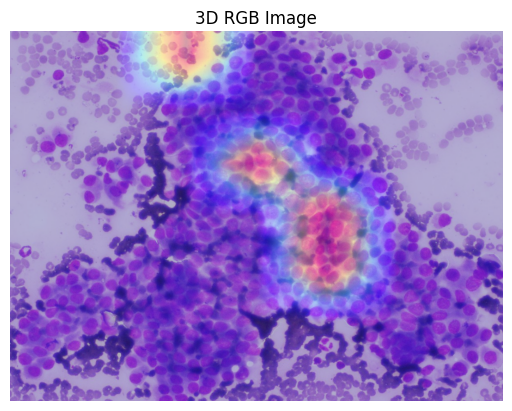

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

def overlay_cam_on_image(image, cam, alpha=0.5, colormap='jet'):
    """
    Chồng bản đồ nhiệt CAM lên hình ảnh gốc.

    Parameters:
    - image: Hình ảnh gốc dưới dạng numpy array.
    - cam: Bản đồ nhiệt CAM dưới dạng numpy array.
    - alpha: Hệ số hòa trộn giữa CAM và hình ảnh gốc (0: chỉ hình ảnh gốc, 1: chỉ CAM).
    - colormap: Bảng màu sử dụng cho CAM.
    """
    # Chuyển CAM thành hình ảnh màu
    cam = np.uint8(255 * cam)  # Chuyển đổi giá trị CAM về khoảng [0, 255]
    cam_color = plt.get_cmap(colormap)(cam)  # Áp dụng bảng màu
    cam_color = np.uint8(255 * cam_color[:, :, :3])  # Chọn kênh màu RGB
    new_image = image * 255
    # Hòa trộn CAM và hình ảnh gốc
    blended_image = np.clip(alpha * cam_color + (1 - alpha) * new_image, 0, 255).astype(np.uint8)
    
    return blended_image

# Chồng CAM lên hình ảnh gốc
blended_image = overlay_cam_on_image(model.origin_image, image_level_heatmap, alpha=0.3)
# Vẽ hình ảnh RGB
plt.imshow(blended_image)
plt.title('3D RGB Image')
plt.axis('off')  # Ẩn các trục
plt.show()

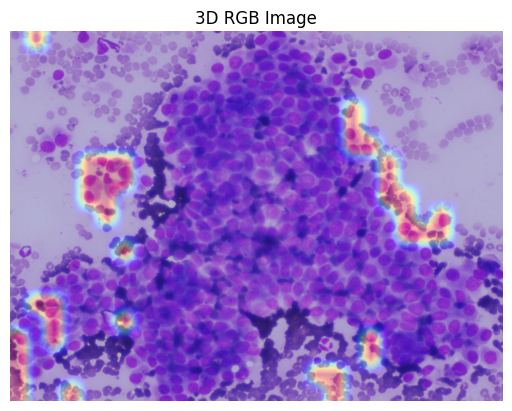

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

def overlay_cam_on_image(image, cam, alpha=0.5, colormap='jet'):
    """
    Chồng bản đồ nhiệt CAM lên hình ảnh gốc.

    Parameters:
    - image: Hình ảnh gốc dưới dạng numpy array.
    - cam: Bản đồ nhiệt CAM dưới dạng numpy array.
    - alpha: Hệ số hòa trộn giữa CAM và hình ảnh gốc (0: chỉ hình ảnh gốc, 1: chỉ CAM).
    - colormap: Bảng màu sử dụng cho CAM.
    """
    # Chuyển CAM thành hình ảnh màu
    cam = np.uint8(255 * cam)  # Chuyển đổi giá trị CAM về khoảng [0, 255]
    cam_color = plt.get_cmap(colormap)(cam)  # Áp dụng bảng màu
    cam_color = np.uint8(255 * cam_color[:, :, :3])  # Chọn kênh màu RGB
    new_image = image * 255
    # Hòa trộn CAM và hình ảnh gốc
    blended_image = np.clip(alpha * cam_color + (1 - alpha) * new_image, 0, 255).astype(np.uint8)
    
    return blended_image

# Chồng CAM lên hình ảnh gốc
blended_image = overlay_cam_on_image(model.origin_image, patch_level_heatmap, alpha=0.3)
# Vẽ hình ảnh RGB
plt.imshow(blended_image)
plt.title('3D RGB Image')
plt.axis('off')  # Ẩn các trục
plt.show()

In [3]:
print(predicted, outputs)

tensor([2]) (tensor([[7.9506e-25, 8.6528e-27, 1.0000e+00]], grad_fn=<SoftmaxBackward0>), tensor([[-1.6374e+02, -1.5031e+01, -9.5463e+00],
        [-1.9463e+02, -1.7924e+01, -1.1337e+01],
        [-1.9046e+02, -1.7534e+01, -1.1096e+01],
        [-7.7851e+01, -6.9856e+00, -4.5658e+00],
        [-2.5562e+02, -2.3586e+01, -1.4839e+01],
        [-8.5942e+01, -7.7430e+00, -5.0346e+00],
        [-1.4818e+02, -1.3573e+01, -8.6438e+00],
        [-2.4824e+02, -2.2902e+01, -1.4416e+01],
        [-3.4415e+02, -3.1793e+01, -1.9914e+01],
        [-1.1866e+02, -1.0808e+01, -6.9318e+00],
        [-2.7474e+02, -2.5359e+01, -1.5935e+01],
        [-8.2101e+01, -7.3832e+00, -4.8119e+00],
        [-7.4856e+01, -6.7049e+00, -4.3920e+00],
        [-2.6059e+02, -2.4047e+01, -1.5124e+01],
        [-1.4903e+01,  2.3775e-01, -8.8803e-03],
        [-7.5397e+01, -6.7553e+00, -4.4232e+00],
        [-1.2387e+02, -1.1296e+01, -7.2341e+00],
        [-2.2038e+02, -2.0320e+01, -1.2819e+01]], grad_fn=<AddmmBackward0>), a

In [2]:
# output_model2, cam_end_CNN_softmax,  = model.get_output_model2(output_model1) # cam_begin_CNN_softmax

<class 'torch.Tensor'> torch.Size([18, 1280, 7, 7]) torch.float32
torch.Size([18, 1280, 7, 7]) torch.float32
torch.Size([1280]) torch.float32
torch.Size([18, 49])
torch.Size([18, 1280, 49])
torch.Size([18, 7, 7])
torch.Size([18, 7, 7])


In [3]:
# print(output_model2.shape, cam_end_CNN_softmax.shape,) # cam_begin_CNN_softmax.shape)

torch.Size([18, 3]) torch.Size([18, 7, 7])


In [4]:
# del output_model1

In [5]:
# cam_begin_CNN_softmax

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image
# import cv2

# def create_custom_colormap():
#     """
#     Tạo bảng màu tùy chỉnh với màu đỏ cho giá trị cao và trong suốt cho giá trị thấp.
#     """
#     from matplotlib.colors import LinearSegmentedColormap

#     # Tạo bảng màu tùy chỉnh với màu đỏ và trong suốt
#     cdict = {
#         'red':   [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)],
#         'green': [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)],
#         'blue':  [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)],
#         'alpha': [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)]
#     }

#     custom_colormap = LinearSegmentedColormap('CustomMap', segmentdata=cdict)
#     return custom_colormap

# def overlay_cam_on_image(image, cam, alpha=0.5, colormap='jet'):
#     """
#     Chồng bản đồ nhiệt CAM lên hình ảnh gốc.

#     Parameters:
#     - image: Hình ảnh gốc dưới dạng numpy array.
#     - cam: Bản đồ nhiệt CAM dưới dạng numpy array.
#     - alpha: Hệ số hòa trộn giữa CAM và hình ảnh gốc (0: chỉ hình ảnh gốc, 1: chỉ CAM).
#     - colormap: Bảng màu sử dụng cho CAM.
#     """
#     # Chuẩn hóa giá trị CAM về khoảng [0, 1]
#     cam_normalized = cam # (cam - cam.min()) / (cam.max() - cam.min())

#     # Tạo bảng màu tùy chỉnh
#     colormap = create_custom_colormap()
#     cam_color = colormap(cam_normalized)  # Áp dụng bảng màu
#     cam_color = np.uint8(255 * cam_color[:, :, :3])  # Chọn kênh màu RGB

#     # Hòa trộn CAM và hình ảnh gốc
#     blended_image = np.clip(alpha * cam_color * 255 + (1 - alpha) * image * 255, 0, 255).astype(np.uint8)
    
#     return blended_image

# def visualize_images_with_cam(images, cam_images, alpha=0.5, cols=6):
#     """
#     Hiển thị các hình ảnh gốc với CAM chồng lên.

#     Parameters:
#     - images: Danh sách các hình ảnh gốc dưới dạng numpy arrays.
#     - cam_images: Danh sách các bản đồ nhiệt CAM dưới dạng numpy arrays.
#     - alpha: Hệ số hòa trộn giữa CAM và hình ảnh gốc.
#     - cols: Số cột trong lưới subplot.
#     """
#     num_images = min(len(images), len(cam_images))
#     rows = (num_images + cols - 1) // cols  # Tính số hàng cần thiết

#     fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2.5))
    
#     for i in range(num_images):
#         ax = axes[i // cols, i % cols]
        

#         # Overlay CAM on image
#         blended_image = overlay_cam_on_image(images[i], cam_images[i], alpha)
        
#         ax.imshow(blended_image)
#         ax.axis('off')  # Ẩn trục

#     # Ẩn các subplot không được sử dụng
#     for j in range(num_images, rows * cols):
#         axes[j // cols, j % cols].axis('off')

#     plt.show()

# # Giả sử bạn đã có danh sách các hình ảnh gốc và CAM
# # images: danh sách các hình ảnh gốc
# # cam_images: danh sách các bản đồ nhiệt CAM
# visualize_images_with_cam(output_model1, cam_begin_CNN_softmax.detach().numpy(), alpha=0.6)

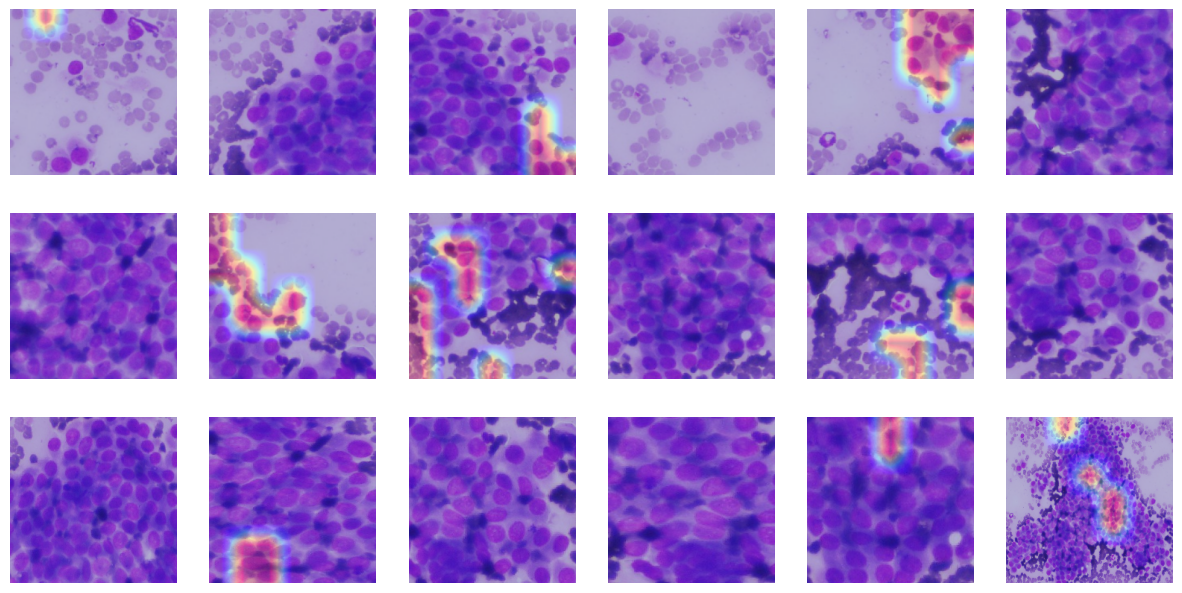

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

def overlay_cam_on_image(image, cam, alpha=0.5, colormap='jet'):
    """
    Chồng bản đồ nhiệt CAM lên hình ảnh gốc.

    Parameters:
    - image: Hình ảnh gốc dưới dạng numpy array.
    - cam: Bản đồ nhiệt CAM dưới dạng numpy array.
    - alpha: Hệ số hòa trộn giữa CAM và hình ảnh gốc (0: chỉ hình ảnh gốc, 1: chỉ CAM).
    - colormap: Bảng màu sử dụng cho CAM.
    """
    # Chuyển CAM thành hình ảnh màu
    cam = np.uint8(255 * cam)  # Chuyển đổi giá trị CAM về khoảng [0, 255]
    cam_color = plt.get_cmap(colormap)(cam)  # Áp dụng bảng màu
    cam_color = np.uint8(255 * cam_color[:, :, :3])  # Chọn kênh màu RGB
    new_image = image * 255
    # Hòa trộn CAM và hình ảnh gốc
    blended_image = np.clip(alpha * cam_color + (1 - alpha) * new_image, 0, 255).astype(np.uint8)
    
    return blended_image

def visualize_images_with_cam(images, cam_images, alpha=0.5, cols=6):
    """
    Hiển thị các hình ảnh gốc với CAM chồng lên.

    Parameters:
    - images: Danh sách các hình ảnh gốc dưới dạng numpy arrays.
    - cam_images: Danh sách các bản đồ nhiệt CAM dưới dạng numpy arrays.
    - alpha: Hệ số hòa trộn giữa CAM và hình ảnh gốc.
    - cols: Số cột trong lưới subplot.
    """
    num_images = min(len(images), len(cam_images))
    rows = (num_images + cols - 1) // cols  # Tính số hàng cần thiết

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2.5))
    
    for i in range(num_images):
        ax = axes[i // cols, i % cols]
        
        # Overlay CAM on image
        real_cam = cv2.resize(cam_images[i], (images[i].shape[1], images[i].shape[0]))
        blended_image = overlay_cam_on_image(images[i], real_cam, alpha)
        
        ax.imshow(blended_image)
        ax.axis('off')  # Ẩn trục

    # Ẩn các subplot không được sử dụng
    for j in range(num_images, rows * cols):
        axes[j // cols, j % cols].axis('off')

    plt.show()

visualize_images_with_cam(output_model1, cam_end_CNN_softmax.detach().numpy(), alpha=0.3) #cam_images)


In [8]:
# visualize_images_with_cam(output_model1, cam_begin_CNN_softmax.detach().numpy(), alpha=0.3) #cam_images)

In [9]:
print(cam_end_CNN_softmax.min(), cam_end_CNN_softmax.max())

tensor(0.) tensor(1.)
